In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score


In [17]:
data = pd.read_csv('Advertising.csv')

In [18]:
data.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [4]:
data.drop(['Unnamed: 0'], axis=1, inplace=True)

In [5]:
data.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [7]:
data.describe()

,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


### Simple linear regression

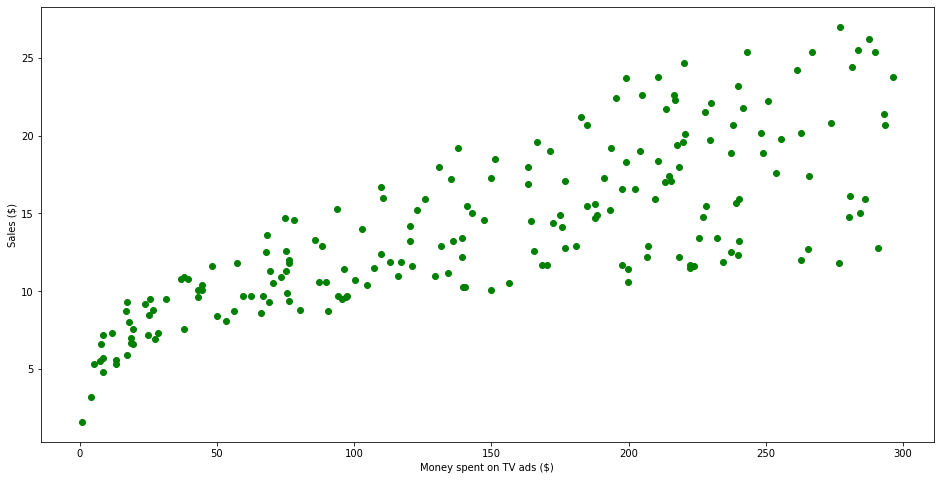

In [8]:
plt.figure(figsize=(16,8))

plt.scatter(
           data['TV'],
           data['sales'],
           c='green'
)

plt.xlabel("Money spent on TV ads ($)")
plt.ylabel("Sales ($)")
plt.show()

In [9]:
X = data['TV'].values.reshape(-1,1)
y = data['sales'].values.reshape(-1,1)

reg = LinearRegression()
reg.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [10]:
print("The linear model is: Y = {:.5} + {:.5}X".format(reg.intercept_[0], reg.coef_[0][0]))

The linear model is: Y = 7.0326 + 0.047537X


In [11]:
predictions = reg.predict(X)

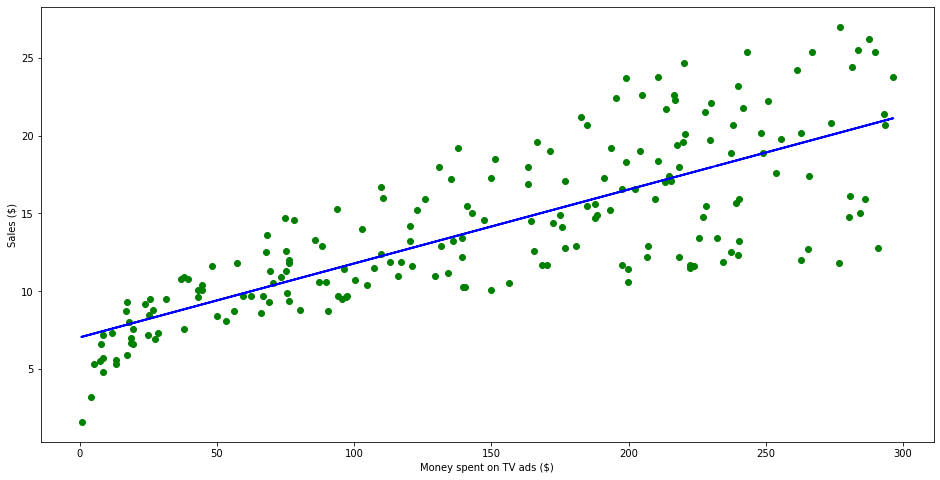

In [12]:
plt.figure(figsize=(16,8))

plt.scatter(
            data['TV'],
            data['sales'], 
            c='green'
           )

plt.plot(
            data['TV'],
            predictions, 
            c='blue',
            linewidth=2
           )


plt.xlabel("Money spent on TV ads ($)")
plt.ylabel("Sales ($)")
plt.show()

### Relevancy of the model

To see if the model is any good, we need to look at the R² value and the p-value from each coefficient.

In [13]:
import statsmodels.api as sm

X = data['TV']
y = data['sales']

X2 = sm.add_constant(X)

est = sm.OLS(y,X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     312.1
Date:                Tue, 09 Jun 2020   Prob (F-statistic):           1.47e-42
Time:                        07:35:58   Log-Likelihood:                -519.05
No. Observations:                 200   AIC:                             1042.
Df Residuals:                     198   BIC:                             1049.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.0326      0.458     15.360      0.0

### Multiple Linear Regression

In [33]:
data = pd.read_csv('Advertising.csv')
Xs = data.drop(['sales', 'Unnamed: 0'], axis=1)
y = data['sales']

reg = LinearRegression()
reg.fit(Xs,y)



LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [38]:
X = np.column_stack((data['TV'], data['radio'], data['newspaper']))
y = data['sales']

est = sm.OLS(y, X)
est2 = est.fit()

print(est2.summary())

                                 OLS Regression Results                                
Dep. Variable:                  sales   R-squared (uncentered):                   0.982
Model:                            OLS   Adj. R-squared (uncentered):              0.982
Method:                 Least Squares   F-statistic:                              3566.
Date:                Tue, 09 Jun 2020   Prob (F-statistic):                   2.43e-171
Time:                        07:42:20   Log-Likelihood:                         -423.54
No. Observations:                 200   AIC:                                      853.1
Df Residuals:                     197   BIC:                                      863.0
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------